In [1]:
import numpy as num
import pylab as lab
import scipy as sci
import pandas as pan
%matplotlib inline

In [1]:
re,fe,rhoe,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe,N=\
2.771916, 2.336509, 34.108882, 7.079952, 3.775974, 0.449644, 0.593713,\
0.413484, 0.826967, -4.099542, -0.754764, 1.766503, -1.578274, -4.17, 0,\
3.474733,  2.288323,  1.39349,  -4.174332,10

In [2]:
re,fe,rhoe,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe,N=\
2.771916, 2.336509, 34.108882, 7.079952, 3.775974, 0.449644,\
0.593713, 0.413484, 0.826967, -4.099542, -0.754764, 1.766503,\
-1.578274, -4.17, 0, 3.474733,  2.288323,  1.39349,  -4.174332,10

In [9]:
def f(r,q,N):
    return fe*num.exp(-beta*(r/re-1))/(1+(r/re-lam)**20)*(1-q/float(N))



def F(rho):
    func=[]
    rhon=0.85*rhoe
    rho0=1.15*rhoe
    for var in rho:
        if(rho<rhon):
            func.append( Fn0*(rho/rhon-1)**0+Fn1*(rho/rhon-1)**1+Fn2*(rho/rhon-1)**2+Fn3*(rho/rhon-1)**3)
        elif (rho>=rhon and rho<rho0):
            func.append(F0*(rho/rhoe-1)**0+F1*(rho/rhoe-1)**1+F2*(rho/rhoe-1)**2+F3*(rho/rhoe-1)**3)
        else:
            func.append(Fe*(1-num.log((rho/rhoe)**eta))*(rho/rhoe)**eta)
    
    func=num.asarray(func)
    return func
        
def phiN(r):
    return A*num.exp(-alpha*(r/re-1))/(1+(r/re-kappa)**20)
#def phiE(r,q):
#    return (1-q/N)*B*num.exp(-beta*(r/re-1))/(1+(r/re-kappa)**20)

def phiE(r):
    return B*num.exp(-beta*(r/re-1))/(1+(r/re-kappa)**20)
def phiT(r):
    return phiN(r)-phiE(r)



In [10]:
x=num.linspace(0,10,1000)
rhon=0.85*rhoe
rho0=1.15*rhoe
rhon,rho0

(28.9925497, 39.2252143)

In [11]:
rho=rhon
print F0*(rho/rhoe-1)**0+F1*(rho/rhoe-1)**1+F2*(rho/rhoe-1)**2+F3*(rho/rhoe-1)**3
print Fe*(1-num.log((rho/rhoe)**eta))*(rho/rhoe)**eta

SyntaxError: invalid syntax (<ipython-input-11-ee6350a5e91f>, line 2)

In [6]:
Fe*(1-num.log((rhon/rhoe)**eta))*(rhon/rhoe)**eta

-4.0821538212178545

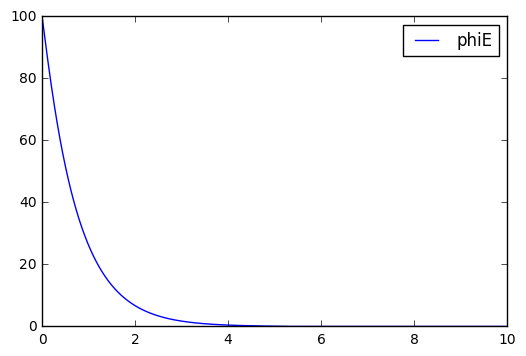

In [13]:
fig=lab.figure()
#lab.plot(x,phi(x),label="phi")
#lab.plot(x,phiN(x),label="phiN")

lab.plot(x,f(x,0,N),label="phiE")
#lab.xlim([0,5])
#lab.ylim([0,30])
lab.legend()
lab.show()



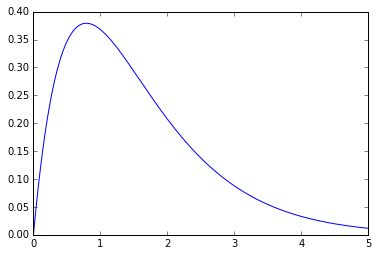

In [8]:
r=num.linspace(0.001,5,1000)
rhoe=num.multiply(10*0.1305*r,num.exp(-1.2663*r))

lab.plot(r,rhoe)
lab.show()

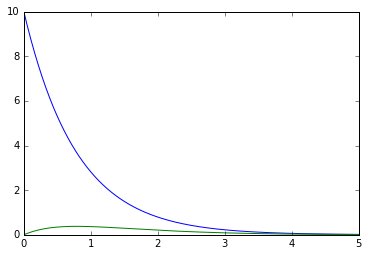

In [9]:
rhon=lambda r:10*num.exp(-1.2663*r)
rhoe=lambda r:num.multiply(10*0.1305*r,num.exp(-1.2663*r))
lab.plot(r,rhon(r),r,rhoe(r))
lab.show()

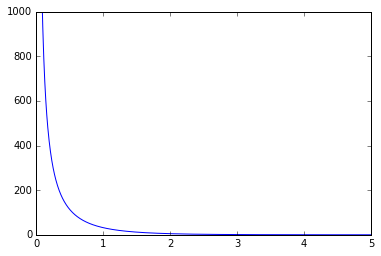

In [10]:
Z=lambda r:rhon(r)+rhoe(r)
lab.plot(r,Z(0)*Z(r)/r)
lab.ylim([0,1000])
lab.show()

In [11]:
78/465.,fe,78/32.

(0.16774193548387098, 2.336509, 2.4375)

In [12]:
B/fe

0.25410259493971565

In [13]:
A/0.1677

2.6812403100775195

(57.61518039467671, 6.194172009856068e-08)
88.3736563748


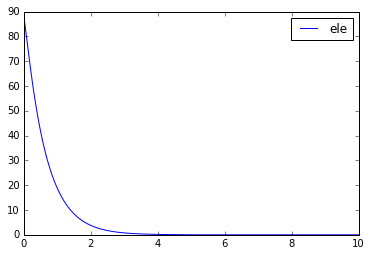

In [14]:
x=num.linspace(0,10,1000)
phiE(0),f(0,0,10)
fe,re,beta,lam=1.554485,2.556162,4.090619,0.86214
f_e=lambda r: fe*num.exp(-beta*(r/re-1))/(1+(r/re-lam)**20)
f_N=lambda r: 0.16*num.exp(-alpha*(r/re-1))/(1+(r/re-kappa)**20)
from scipy import integrate
print integrate.quad(f_e,0,100)
print f_e(0)
lab.plot(x,f_e(x),label="ele")
lab.legend(loc=1)
lab.show()

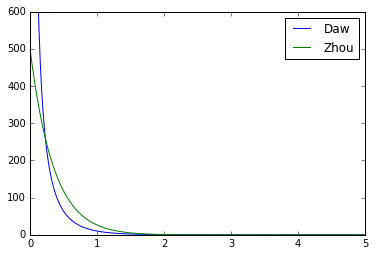

In [28]:
Z=pan.read_csv("Pt.u3.Z.dat",sep="\t",names=["r","Z"])
ZFrame=pan.DataFrame(Z)
phi=(ZFrame.Z)**2/ZFrame.r
lab.plot(ZFrame.r,phi,label="Daw")
lab.plot(ZFrame.r,phiT(ZFrame.r),label="Zhou")
lab.legend(loc=1)
lab.ylim([0,600])
lab.xlim([0,5])
lab.show()


In [18]:

x=num.linspace(0,10,100)

def fPt(r,q):
    re,fe,rhoe,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe,N=\
2.771916, 2.336509, 34.108882, 7.079952, 3.775974, 0.449644, 0.593713,\
0.413484, 0.826967, -4.099542, -0.754764, 1.766503, -1.578274, -4.17, 0,\
3.474733,  2.288323,  1.39349,  -4.174332,10
    return fe*num.exp(-beta*(r/re-1))/(1+(r/re-lam)**20)*(1-q/float(N))



def fCu(r,q):
    re,fe,rhoe,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe,N=\
2.556162, 1.554485, 22.150141, 7.669911, 4.090619, 0.327584, 0.468735,\
0.431307, 0.86214,  -2.176490, -0.140035, 0.285621, -1.750834, -2.19, 0, 0.702991,\
0.683705,  0.92115,  -2.191675,11
    return fe*num.exp(-beta*(r/re-1))/(1+(r/re-lam)**20)*(1-q/float(N))

def fCo(r,q):
    re,fe,rhoe,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe,N=\
    2.505979, 1.975299, 27.206789, 8.679625, 4.629134, 0.421378, 0.640107, 0.5,\
    1.0,      -2.541799, -0.219415, 0.733381, -1.589003, -2.56, 0, 0.705845, -0.687140,  0.694608, -2.559307,9
    return fe*num.exp(-beta*(r/re-1))/(1+(r/re-lam)**20)*(1-q/float(N))

f_Cu=fCu(x,0)
f_Pt=fPt(x,0)
f_Co=fCo(x,0)

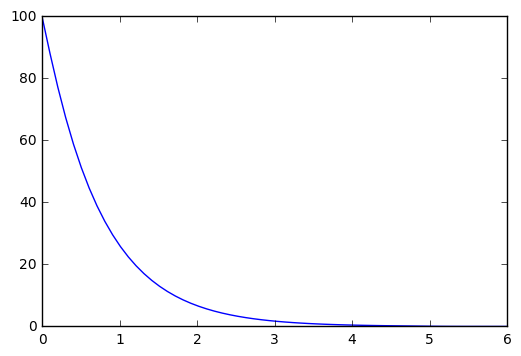

[  8.97603230e+01   7.92516996e+01   6.94457178e+01   6.06526876e+01
   5.29005909e+01   4.61143738e+01   4.01905620e+01   3.50252013e+01
   3.05229719e+01   2.65992734e+01   2.31799135e+01   2.02001041e+01
   1.76033509e+01   1.53404138e+01   1.33683806e+01   1.16498552e+01
   1.01522488e+01   8.84716197e+00   7.70984602e+00   6.71873373e+00
   5.85503042e+00   5.10235747e+00   4.44644175e+00   3.87484499e+00
   3.37672784e+00   2.94264441e+00   2.56436305e+00   2.23471033e+00
   1.94743496e+00   1.69708927e+00   1.47892590e+00   1.28880775e+00
   1.12312958e+00   9.78749583e-01   8.52929840e-01   7.43284362e-01
   6.47733777e-01   5.64465677e-01   4.91899670e-01   4.28655959e-01
   3.73525848e-01   3.25441644e-01   2.83441882e-01   2.46625415e-01
   2.14085405e-01   1.84815651e-01   1.57603122e-01   1.31007231e-01
   1.03729138e-01   7.57473218e-02   4.95138882e-02   2.87566703e-02
   1.51707339e-02   7.53800016e-03   3.64174501e-03   1.74672961e-03
   8.41489865e-04   4.09551730e-04

In [19]:
fig=lab.figure()
lab.plot(x,f_Pt,label="Pt_f")
#lab.plot(x,f_Cu,label="Cu_f")
#lab.plot(x,f_Co,label="Co_f")
#lab.legend(loc=1)
lab.xlim([0,6])
lab.show()
print(fPt(x,1))

In [8]:
Zhou=pan.read_csv("Zhou.info.dat",sep="\t",names=["atom","type","lat","re","fe","rhoe","alpha","beta","A","B"\
                                                     ,"kappa","lam","Fn0","Fn1","Fn2","Fn3","F0","F1","F2","F3","eta","Fe"])

OSError: File b'Zhou.info.dat' does not exist

In [19]:
Zhou

,atom,type,lat,re,fe,rhoe,alpha,beta,A,B,...,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe
0,Cu,Zhou,FCC,2.556162,1.554485,22.150141,7.669911,4.090619,0.327584,0.468735,...,-2.176490,-0.140035,0.285621,-1.750834,-2.19,0,0.702991,0.683705,0.921150,-2.191675
1,Ag,Zhou,FCC,2.891814,1.106232,15.539255,7.944536,4.237086,0.266074,0.386272,...,-1.729619,-0.221025,0.541558,-0.967036,-1.75,0,0.983967,0.520904,1.149461,-1.751274
2,Au,Zhou,FCC,2.885034,1.529021,21.319637,8.086176,4.312627,0.230728,0.336695,...,-2.930281,-0.554034,1.489437,-0.886809,-2.98,0,2.283863,0.494127,1.286960,-2.981365
3,Ni,Zhou,FCC,2.488746,2.007018,27.984706,8.029633,4.282471,0.439664,0.632771,...,-2.693996,-0.066073,0.170482,-2.457442,-2.70,0,0.282257,0.102879,0.509860,-2.700493
4,Pd,Zhou,FCC,2.750897,1.595417,22.770550,7.605017,4.056009,0.385412,0.545121,...,-2.320473,-0.421263,0.966525,-0.932685,-2.36,0,1.966273,1.396717,1.399758,-2.362609
5,Pt,Zhou,FCC,2.771916,2.336509,34.108882,7.079952,3.775974,0.449644,0.593713,...,-4.099542,-0.754764,1.766503,-1.578274,-4.17,0,3.474733,2.288323,1.393490,-4.174332
6,Al,Zhou,FCC,2.886166,1.392302,20.226537,6.942419,3.702623,0.251519,0.313394,...,-2.806783,-0.276173,0.893409,-1.637201,-2.83,0,0.929508,-0.682320,0.779208,-2.829437
7,Pb,Zhou,FCC,3.499723,0.647872,8.906840,8.468412,4.516486,0.134878,0.203093,...,-1.419644,-0.228622,0.630069,-0.560952,-1.44,0,0.921049,0.108847,1.172361,-1.440494
8,Fe,Zhou,BCC,2.481987,1.885957,20.041463,9.818270,5.236411,0.392811,0.646243,...,-2.534992,-0.059605,0.193065,-2.282322,-2.54,0,0.200269,-0.148770,0.391750,-2.539945
9,Mo,Zhou,BCC,2.728100,2.723710,29.354065,8.393531,4.476550,0.708787,1.120373,...,-3.692913,-0.178812,0.380450,-3.133650,-3.71,0,0.875874,0.776222,0.790879,-3.712093


In [20]:
def fEle(r,n,frame):
    data=list(frame.iloc[n])
    atom,name,lat,re,fe,rhoe,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe=data
    
    return fe*num.exp(-beta*(r/re-1))/(1+(r/re-lam)**20)

def phiN_(r,n,frame):
    data=list(frame.iloc[n])
    atom,name,lat,re,fe,rhoe,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe=data
    return A*num.exp(-alpha*(r/re-1))/(1+(r/re-kappa)**20)
#def phiE(r,q):
#    return (1-q/N)*B*num.exp(-beta*(r/re-1))/(1+(r/re-kappa)**20)

def phiE_(r,n,frame):
    data=list(frame.iloc[n])
    atom,name,lat,re,fe,rhoe,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe=data
    return B*num.exp(-beta*(r/re-1))/(1+(r/re-kappa)**20)

def phiT_(r,n,frame):
    return phiN_(r,n,frame)+phiE_(r,n,frame)



def F_(rho,n,frame):
    func=[]
    data=list(frame.iloc[n])
    atom,name,lat,re,fe,rhoe,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe=data
    rhon=0.85*rhoe
    rho0=1.15*rhoe
    for var in rho:
        if(var<rhon):
            func.append(Fn0*(var/rhon-1)**0+Fn1*(var/rhon-1)**1+Fn2*(var/rhon-1)**2+Fn3*(var/rhon-1)**3)
        elif (var>=rhon and var<rho0):
            func.append(F0*(var/rhoe-1)**0+F1*(var/rhoe-1)**1+F2*(var/rhoe-1)**2+F3*(var/rhoe-1)**3)
        else:
            func.append(Fe*(1-num.log((var/rhoe)**eta))*(var/rhoe)**eta)
    func=num.asarray(func)
    return func

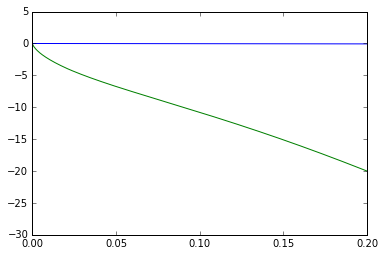

In [62]:
x=num.linspace(0,100,1000)
F=pan.read_csv("Cu_u3.F.dat",sep="\t",names=["rho","F"])
FFrame=pan.DataFrame(F)
FFunc=interp1d(FFrame.rho,FFrame.F)
#lab.plot(FFrame.rho,FFunc(FFrame.rho))
var=0
#lab.plot(x,F_(x,var,Zhou),label=Zhou.atom[var])
lab.plot(x,F_(x,var,Zhou),FFrame.rho,FFunc(FFrame.rho))

#lab.legend(loc=1)
lab.xlim([0,0.2])
#lab.ylim([-5,0])
lab.savefig("fele.pdf")
lab.show()

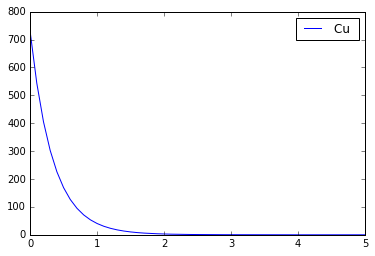

In [51]:
for var in [0]:
    lab.plot(x,phiT_(x,var,Zhou),label=Zhou.atom[var])

lab.legend(loc=1)
lab.xlim([0,5])    
lab.show()

In [6]:
for atoms in [5]:
    lab.plot(x,fEle(x,atoms,Zhou),label=Zhou.atom[atoms])

lab.legend(loc=1)
lab.xlim([0,5])
#lab.ylim([-1,0])
lab.show()

NameError: name 'fEle' is not defined

In [7]:
def Energy(x,n,frame):
    density=12*fEle(x,n,frame)
    potential=12*phiT_(x,n,frame)
    embedded=F_(density,n,frame)
    return potential+embedded

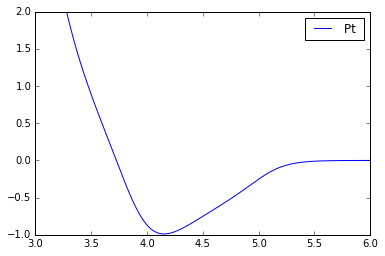

In [515]:
for atoms in range(5,6):
    lab.plot(x,Energy(x,atoms,Zhou),label=Zhou.atom[atoms])

lab.legend(loc=1)
lab.ylim([-1,2])
lab.xlim([3,6]) 
lab.show()

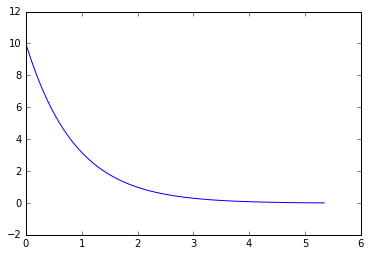

In [33]:
from scipy.interpolate import interp1d
Z=pan.read_csv("Pt.u3.Z.dat",sep="\t",names=["r","Z"])
ZFrame=pan.DataFrame(Z)
ZFunc = interp1d(ZFrame.r, ZFrame.Z, kind='cubic')
lab.plot(ZFrame.r,ZFunc(ZFrame.r))

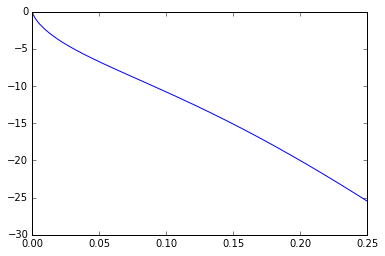

In [34]:
F=pan.read_csv("Cu_u3.F.dat",sep="\t",names=["rho","F"])
FFrame=pan.DataFrame(F)
FFunc=interp1d(FFrame.rho,FFrame.F)
lab.plot(FFrame.rho,FFunc(FFrame.rho))

In [5]:
rho=pan.read_csv("Pt_u3.rho.dat",sep="\t",names=["r","rho"])
RhoF=pan.DataFrame(rho)
RFunc=sci.interp1d(RhoF.r,RhoF.rho)
lab.plot(RhoF.r,RFunc(RhoF.r))
lab.ylim([0,0.20])

AttributeError: module 'scipy' has no attribute 'interp1d'

In [415]:
def EnergyDaw(r):
    density=12*RFunc(r)
    Potential=ZFunc(r)*ZFunc(r)/r
    Embedded=FFunc(density)
    return Potential+Embedded



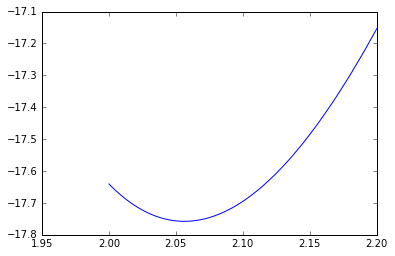

In [520]:
r=num.linspace(2,2.2,100)

lab.plot(r,EnergyDaw(r))

In [11]:
def f(r,q,N,fe,beta,re,lam):
    return fe*num.exp(-beta*(r/re-1))/(1+(r/re-lam)**20)*(1-q/float(N))

def phiN(r,A,alpha,re,kappa):
    return A*num.exp(-alpha*(r/re-1))/(1+(r/re-kappa)**20)
#def phiE(r,q):
#    return (1-q/N)*B*num.exp(-beta*(r/re-1))/(1+(r/re-kappa)**20)

def phiE(r,B,beta,re,kappa):
    return B*num.exp(-beta*(r/re-1))/(1+(r/re-kappa)**20)
def phiT(r,A,alpha,re,B,beta,kappa):
    return phiN(r,A,alpha,re,kappa)-phiE(r,B,beta,re,kappa)

In [68]:
re_O,A_O,alpha_O,B_O,beta_O,lam_O,fe_O,kappa_O=3.64857,0.34900,5.44072,0.57438,3.59746,0.39310,1.39479,0.08007


re_Al,A_Al,alpha_Al,B_Al,beta_Al,lam_Al,fe_Al,kappa_Al=2.86392,0.31487,6.61317,0.36555,3.52702,0.75969,1.20378,0.37985


A_AlO,alpha_AlO,re_AlO,B_AlO,beta_AlO,kappa_AlO=0.09738,8.49741,2.98520,0.38121,4.52114,0.18967


re_Al04,A_Al04,alpha_Al04,B_Al04,beta_Al04,lam_Al04,fe_Al04,kappa_Al04=2.863924,0.134873,6.613165,0.365551,3.527021,0.759692,\
                    1.403115,0.379846
    
    
r=num.linspace(2,4,1000)

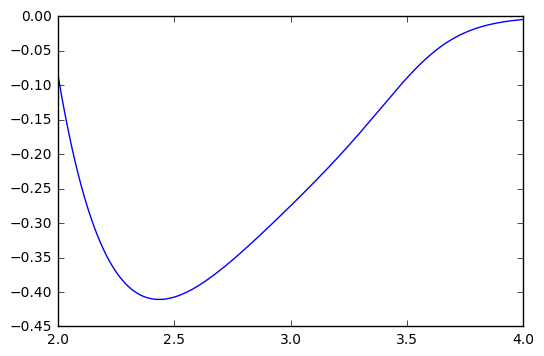

In [69]:
phiO_Al=phiT(r,A_AlO,alpha_AlO,re_AlO,B_AlO,beta_AlO,kappa_AlO)
lab.plot(r,phiO_Al)

In [70]:
f_Al=f(r,0,3,fe_Al,beta_Al,re_Al,lam_Al)
f_Al04=f(r,0,3,fe_Al04,beta_Al04,re_Al04,lam_Al04)

In [71]:
f_O=f(r,0,6,fe_O,beta_O,re_O,lam_O)

In [72]:
phiAl_Al=phiT(r,A_Al,alpha_Al,re_Al,B_Al,beta_Al,kappa_Al)
phiAl_Al04=phiT(r,A_Al04,alpha_Al04,re_Al04,B_Al04,beta_Al04,kappa_Al04)

In [73]:
phiO_O=phiT(r,A_O,alpha_O,re_O,B_O,beta_O,kappa_O)

In [74]:
phiAl_OJonson=(1/2)*((f_Al/f_O)*phiO_O+(f_O/f_Al)*phiAl_Al)

phiAl_OJonson04=(1/2)*((f_Al04/f_O)*phiO_O+(f_O/f_Al04)*phiAl_Al04)

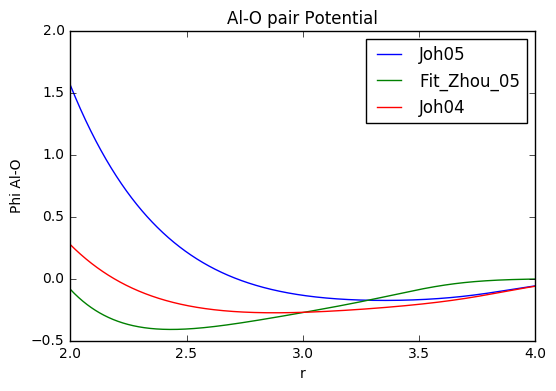

In [75]:
lab.plot(r,phiAl_OJonson,label="Joh05")
lab.plot(r,phiO_Al,label="Fit_Zhou_05")
lab.plot(r,phiAl_OJonson04,label="Joh04")
lab.title("Al-O pair Potential")
lab.xlabel("r")
lab.ylabel("Phi Al-O")
lab.legend()
lab.savefig("AlO.eps")
lab.show()